### Problem statement:-

The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

The dataset contains transactions made over a period of two days in September 2013 by European credit cardholders. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms. 


## Steps:-
The steps are broadly divided into below steps. The sub steps are also listed while we approach each of the steps.
1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Building the model
4. Evaluate the model

In [67]:
# import the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 
import warnings
warnings.filterwarnings('ignore')

# Exploratory data analysis

In [68]:
data = pd.read_csv("creditcard.csv") 

In [27]:
# to have a look at the data
data.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
# To Print the shape of the data 
print(data.shape) 
print(data.describe()) 

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

## Handling missing values

In [29]:
missing_values = data.isnull().sum()

if missing_values.sum() == 0:
    print("There are no missing values in the entire dataset.")
else:
    print("There are missing values in the entire dataset.")

There are no missing values in the entire dataset.


the results show that there no missing values in the dataset columns

checking for the data types in the dataset for us to understand the data well

In [30]:
# Display the data types of variables
data_types = data.dtypes
print(data_types)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


most of the data are float values

### Checking the distribution of the classes in the dataset

In [57]:
classes = data['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

Checking for the percentage of the normal share, the non-fraudulent transactions

In [58]:
normal_share = round((classes[0]/data['Class'].count()*100),2)
normal_share

99.83

checking for the percentage distribution of the fraudulent transactions in the entire dataset

In [59]:
fraud_share = round((classes[1]/data['Class'].count()*100),2)
fraud_share

0.17

Below is to clearly identify and classify the transactions.

In [31]:
# Determine number of fraud cases in dataset 
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


######Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced.
SUGGESTION.
 Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset. But first, let’s implement the model without it and will balance the data only if needed.

In [32]:
print("Amount details of the fraudulent transaction")
fraud["Amount"].describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

To visualise the distribution of fraudulent vs non-fraudulent transactions, by count

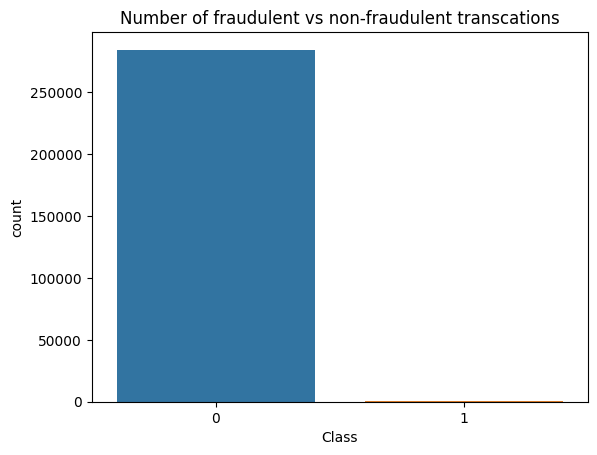

In [60]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=data)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

Visulizing the percentage distribution of the fraudulent vs non-fraudulent transactions

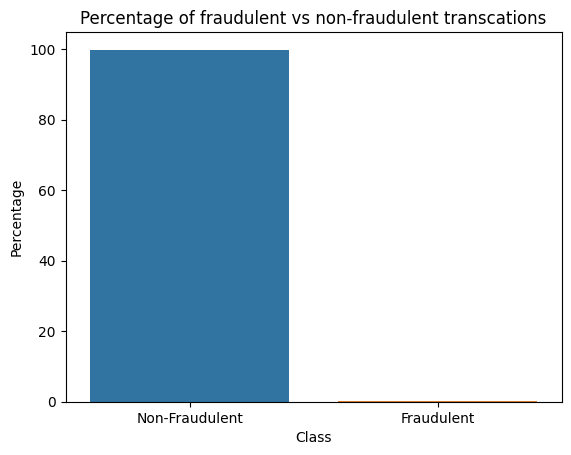

In [61]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
data_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=data_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

In [62]:
# Creating fraudulent dataframe
data_fraud = data[data['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = data[data['Class'] == 0]

To visualize the time vs fraudulent transactions

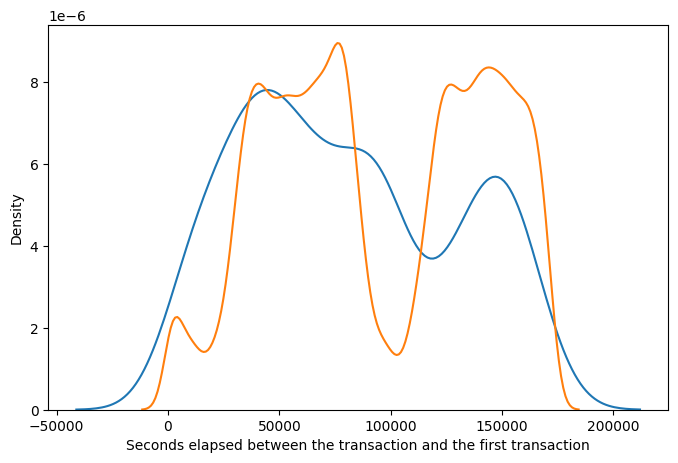

In [69]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transaction and the first transaction')
plt.show()

##### Analysis
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.

C:\Users\Meddieek\AppData\Local\Temp\ipykernel_23268\3532662976.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
C:\Users\Meddieek\AppData\Local\Temp\ipykernel_23268\3532662976.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax

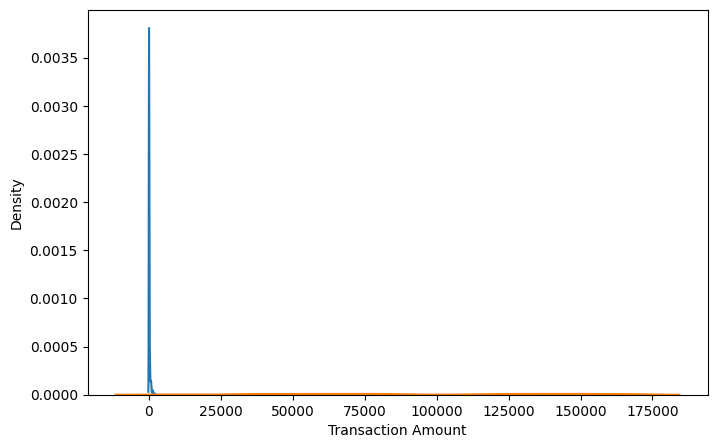

In [66]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transaction Amount')
plt.show()

##### Analysis
We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount. 

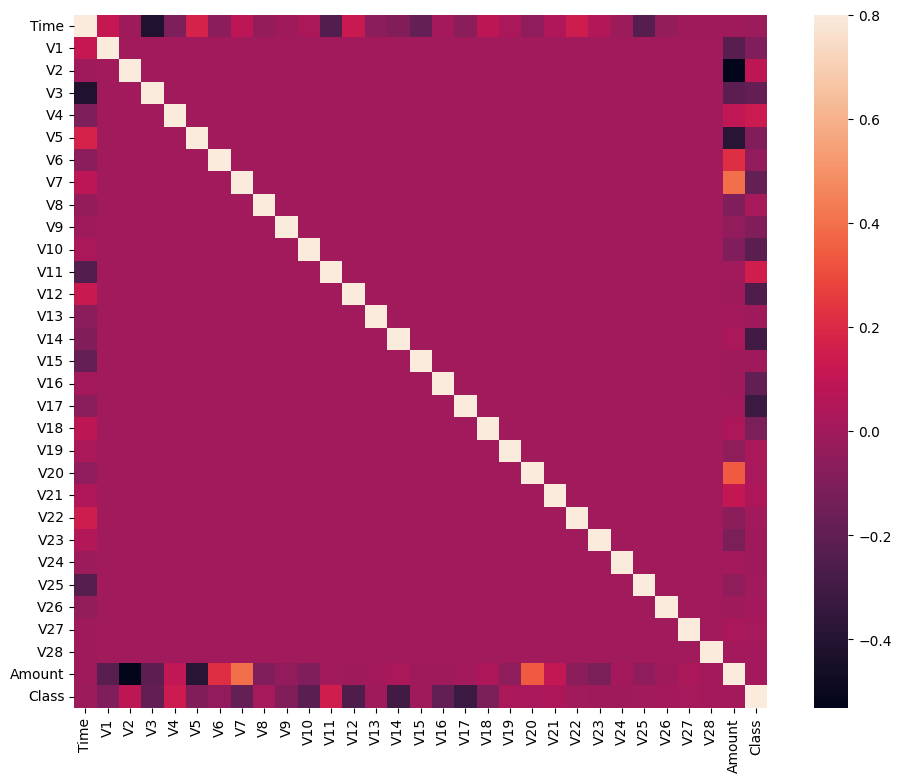

In [33]:
# Correlation matrix 
corrmat = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 


####Analysis of the heatmap:


In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

###Training and Testing Data 
We will be dividing the dataset into two main groups. One for training the model and the other for Testing our trained model’s performance.

In [34]:
# dividing the X and the Y from the dataset 
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing 
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values 


(284807, 30)
(284807,)


In [35]:
# Using Scikit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
		xData, yData, test_size = 0.2, random_state = 42) 


Employing the Random forest model using the sci-kit learn library
## This model performs well on imbalanced data

In [36]:
# Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 
yPred = rfc.predict(xTest) 

In [39]:
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

n_outliers = len(fraud) 
n_errors = (yPred != yTest).sum() 
print("The model used is Random Forest classifier") 

acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 

prec = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 

rec = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 

f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 

MCC = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 


The model used is Random Forest classifier
The accuracy is 0.9995962220427653
The precision is 0.9746835443037974
The recall is 0.7857142857142857
The F1-Score is 0.8700564971751412
The Matthews correlation coefficient is0.8749276812909632


## Analysis on the performance of the Random Forest classifier

The Random Forest classifier demonstrated impressive performance in credit card fraud detection, achieving high accuracy and precision. However, there is a trade-off with recall, indicating that some fraudulent transactions may go undetected. The F1-Score and Matthews correlation coefficient show that the model provides a good balance between precision and recall, making it a strong choice for fraud detection. It's important to monitor and potentially fine-tune the model to further improve its recall if missing fraudulent transactions is a significant concern.

Visualizing the Confusion Matrix

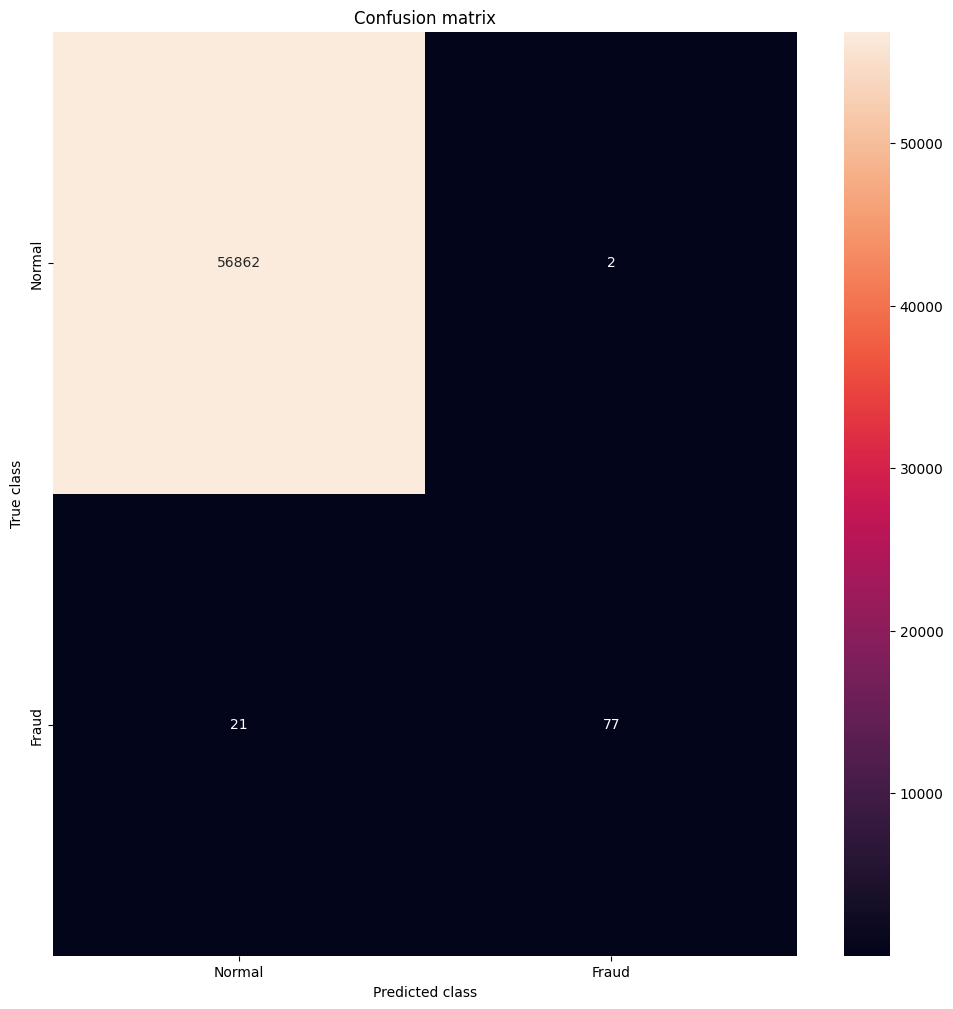

In [40]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, 
			yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

Employing the Gradient Boosting model using the sckit learn ensemble 

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting model creation
gbc = GradientBoostingClassifier()
gbc.fit(xTrain, yTrain)
# Predictions
yPred = gbc.predict(xTest)

In [42]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Gradient Boosting classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is {}".format(MCC))


The model used is Gradient Boosting classifier
The accuracy is 0.9989466661985184
The precision is 0.7375
The recall is 0.6020408163265306
The F1-Score is 0.6629213483146067
The Matthews correlation coefficient is 0.6658229627249665


## Analysis on the Gradient Boosting classifier

The Gradient Boosting classifier achieved high accuracy but has a trade-off between precision and recall. It may have a higher rate of false positives and could miss some actual fraudulent transactions compared to the Random Forest model. The F1-Score and Matthews correlation coefficient indicate a balanced performance but not as strong as the Random Forest model in this context. Depending on your specific priorities, you might consider fine-tuning the model or comparing it with other algorithms to improve its performance further.

Employing the logistic regression model

In [46]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression model creation with an increased max_iter
logistic_reg = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000 or another suitable value
logistic_reg.fit(xTrain, yTrain)

# Predictions
yPred = logistic_reg.predict(xTest)

In [47]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Logistic Regression")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is Logistic Regression
The accuracy is 0.9989466661985184
The precision is 0.8275862068965517
The recall is 0.4897959183673469
The F1-Score is 0.6153846153846154
The Matthews correlation coefficient is 0.636217409828898


## Analysis on the Logistic regression classifier

The Logistic Regression model achieved high accuracy and precision, which is advantageous for reducing false alarms and correctly classifying fraudulent transactions. However, the model has a lower recall, indicating that it may miss a significant number of actual fraudulent transactions. The F1-Score and Matthews correlation coefficient suggest a balanced performance. Depending on your specific use case, you might consider fine-tuning the model or exploring other algorithms to improve recall if capturing more fraud cases is a priority.

In [51]:
import xgboost as xgb
from xgboost import XGBClassifier
# Loading our dataset into xTrain and yTrain
# Splitting our dataset into training and testing sets (xTrain, xTest, yTrain, yTest)


## Using the XGBOOST model

In [52]:
# Create an XGBoost model
xgb_model = XGBClassifier(
    learning_rate=0.1,   # Adjust the learning rate
    n_estimators=100,    # Adjust the number of trees (estimators)
    max_depth=3,         # Adjust the maximum depth of trees
    subsample=0.8,       # Adjust the subsample ratio
    colsample_bytree=0.8,  # Adjust the feature subsampling ratio
)

In [53]:
xgb_model.fit(xTrain, yTrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
yPred = xgb_model.predict(xTest)

In [55]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef

# Evaluating the XGBoost model
acc = accuracy_score(yTest, yPred)
prec = precision_score(yTest, yPred)
rec = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
MCC = matthews_corrcoef(yTest, yPred)

print("The model used is XGBoost")
print("The accuracy is {}".format(acc))
print("The precision is {}".format(prec))
print("The recall is {}".format(rec))
print("The F1-Score is {}".format(f1))
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is XGBoost
The accuracy is 0.9995962220427653
The precision is 0.9746835443037974
The recall is 0.7857142857142857
The F1-Score is 0.8700564971751412
The Matthews correlation coefficient is 0.8749276812909632


## Analysis on the performance of the XGBoost model

The XGBoost model demonstrated exceptional performance in credit card fraud detection, achieving high accuracy, precision, and a good recall rate. The F1-Score and Matthews correlation coefficient highlight the model's ability to balance precision and recall effectively. This model is a strong choice for fraud detection and is capable of minimizing false positives while capturing a substantial number of actual fraud cases. It's important to monitor and potentially fine-tune the model to maintain this high level of performance.